In [49]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [50]:
# reading the dataset
df=pd.read_csv("SalaryData_Test.csv")
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [51]:
#Data Structure 

df.shape

(15060, 14)

In [52]:
#performing EDA on the dataset

# getting the count values for different variables
df['workclass'].value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

In [53]:
df['education'].value_counts()

 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

In [54]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [55]:
df['occupation'].value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

In [8]:
df['relationship'].value_counts()

 Husband           6203
 Not-in-family     3976
 Own-child         2160
 Unmarried         1576
 Wife               685
 Other-relative     460
Name: relationship, dtype: int64

In [56]:
df['race'].value_counts()

 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race, dtype: int64

In [57]:
df['native'].value_counts()

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 Dominican-Republic               30
 Japan                            30
 South                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Jamaica                          23
 Guatemala                        23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

In [58]:
# copying the data to df1 so that the original data will not get affected
df1=df.copy()


In [59]:
# assigning specific values to string datasets
labelencoder = LabelEncoder()
df1.iloc[:,1] = labelencoder.fit_transform(df1.iloc[:,1])
df1.iloc[:,2] = labelencoder.fit_transform(df1.iloc[:,2])
df1.iloc[:,4] = labelencoder.fit_transform(df1.iloc[:,4])
df1.iloc[:,5] = labelencoder.fit_transform(df1.iloc[:,5])
df1.iloc[:,6] = labelencoder.fit_transform(df1.iloc[:,6])
df1.iloc[:,7] = labelencoder.fit_transform(df1.iloc[:,7])
df1.iloc[:,12] = labelencoder.fit_transform(df1.iloc[:,12])
df1.iloc[:,8] = labelencoder.fit_transform(df1.iloc[:,8])


Text(0, 0.5, 'hoursperweek')

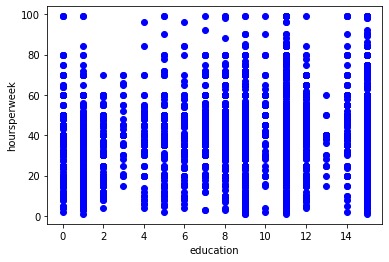

In [60]:
plt.plot(df1.education,df1.hoursperweek,"bo")
plt.xlabel("education")
plt.ylabel("hoursperweek") 

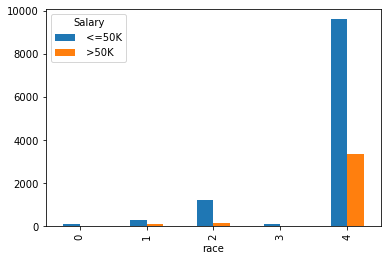

In [61]:
pd.crosstab(df1.race,df1.Salary).plot(kind="bar")

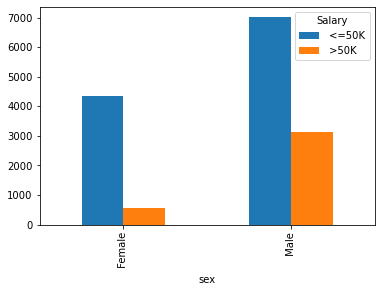

In [62]:
pd.crosstab(df.sex,df1.Salary).plot(kind="bar")

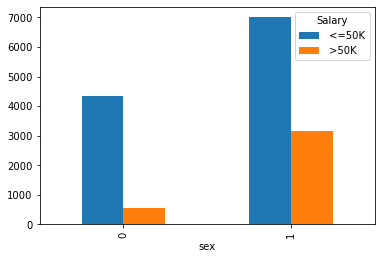

In [63]:
pd.crosstab(df1.sex,df1.Salary).plot(kind="bar")

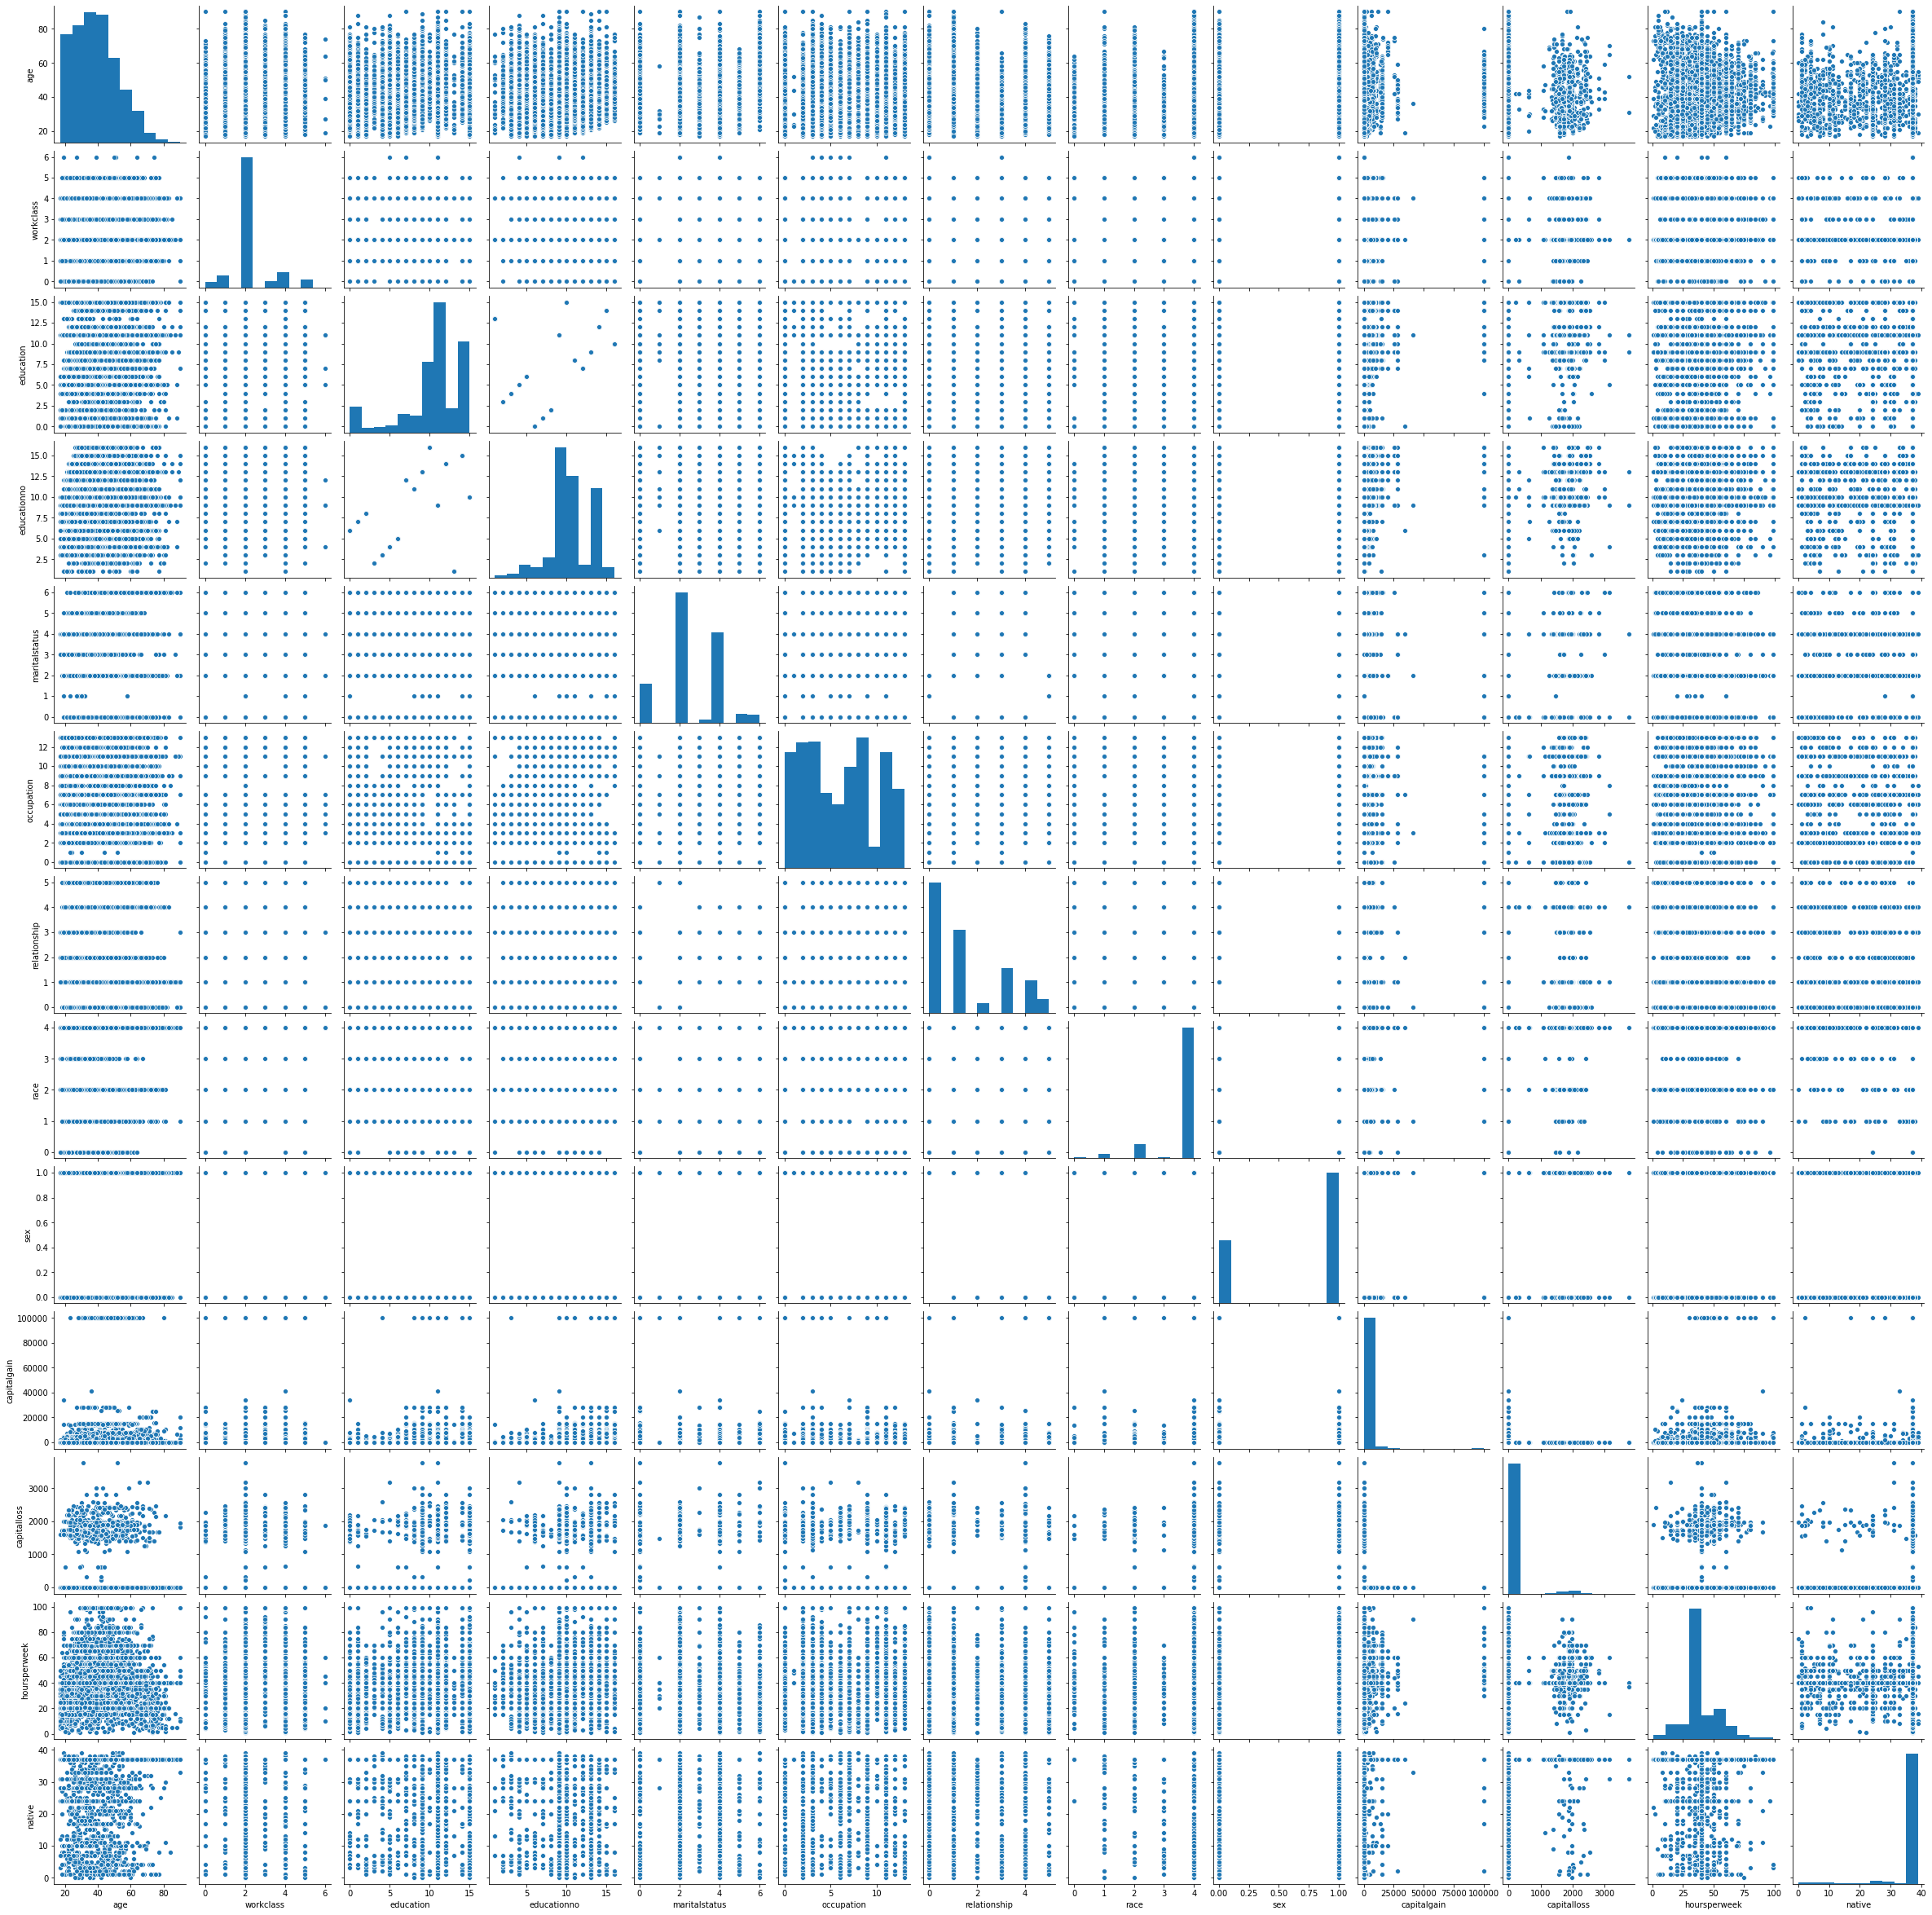

In [64]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df1)

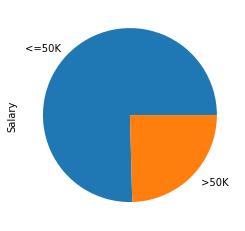

In [65]:
# pie-chart to know the  number of people with salary<=50 & >50
df1.Salary.value_counts().plot(kind="pie") 

In [66]:
# selecting only top 1000 rows as SVM takes arbitarely long time to execute 20000 rows
df2=df1.head(1000)

In [67]:
# defining target and independent variables
X=df2.iloc[:,0:13]
Y=df2.iloc[:,13]

In [68]:
# assigning data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [69]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 13), (700,), (300, 13), (300,))

In [70]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [71]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.7271428571428571)

In [72]:
clf = SVC(kernel='rbf')
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 83.0


array([[240,   1],
       [ 50,   9]], dtype=int64)

In [ ]:
# the model is developed with an accuracy 83%